In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np 
import re
from sklearn.preprocessing import StandardScaler

# Data Science Project Architecture
## Getting a feel of an end-to-end data science solution

In this lab, you'll see how all the pieces of data science: data analysis, code, tooling, experiments, come together to create a complete project. You'll perform a smaller-scale demonstration of a data science project lifecycle. Of course, you have to keep in mind that "real-life" data science is highly iterative. You might be working on the same task(s) for weeks or months - this lab is not able to show that.

You'll be working with the asthma dataset located [here](https://www.kaggle.com/datasets/rabieelkharoua/asthma-disease-dataset). As always, it's preloaded for you in the `data/` directory. **Your main goal is to predict what factors lead to positive diagnosis.**

This time, I suggest you do your research into separate notebooks, not inside this one. Use one or several, as you see fit; there are no guidelines as to how many notebooks you should have, or how long (or short) they have to be.

### Problem 1. Project structure (1 point)
Create the necessary directories and structure that you'll use to put your work in. I am providing a suggestion, but you don't have to follow it.
`data/` for... data :D
`notebooks/` for your research. Feel free to move this one inside.
`src/` for Python code (which you'll need to create towards the end of the lab)
`test/` (or `tests/`) for unit tests

You may add any other structure you like. For inspiration, you can see how popular libraries handle their file structure.

Create a GitHub repo (or any other Git-based source control, but I **highly** suggest GitHub) containing your initial project structure. Don't forget to commit relatively often so you have a way to track what you've done so far and go back if something goes awry.

### Problem 2. Data Exploration (1 point)
In an appropriate notebook, load the data. Ensure its validity and start your EDA. Feel free to create any visualizations, tables, filters, etc. you see fit.

In [3]:
data = pd.read_csv('data/asthma_disease_data.csv')

In [4]:
data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,7421,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,...,3.125249,5.166032,0,1,0,0,0,1,1,Dr_Confid
2388,7422,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,...,1.132977,5.509502,0,0,0,1,1,0,1,Dr_Confid
2389,7423,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,...,1.685962,3.346877,1,0,1,1,0,1,1,Dr_Confid
2390,7424,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,...,3.481549,1.713274,0,1,1,0,1,1,0,Dr_Confid


In [13]:
data.shape

(2392, 29)

In [5]:
data.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'PollutionExposure', 'PollenExposure', 'DustExposure', 'PetAllergy',
       'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever',
       'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC',
       'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing',
       'NighttimeSymptoms', 'ExerciseInduced', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [14]:
data.dtypes

PatientID                   int64
Age                         int64
Gender                      int64
Ethnicity                   int64
EducationLevel              int64
BMI                       float64
Smoking                     int64
PhysicalActivity          float64
DietQuality               float64
SleepQuality              float64
PollutionExposure         float64
PollenExposure            float64
DustExposure              float64
PetAllergy                  int64
FamilyHistoryAsthma         int64
HistoryOfAllergies          int64
Eczema                      int64
HayFever                    int64
GastroesophagealReflux      int64
LungFunctionFEV1          float64
LungFunctionFVC           float64
Wheezing                    int64
ShortnessOfBreath           int64
ChestTightness              int64
Coughing                    int64
NighttimeSymptoms           int64
ExerciseInduced             int64
Diagnosis                   int64
DoctorInCharge             object
dtype: object

In [6]:
data.isnull().sum()

PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64

In [15]:
data.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,...,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,6229.500000,42.137960,0.493311,0.669732,1.307274,27.244877,0.141722,5.051786,5.022867,7.019012,...,0.158027,2.548564,3.741270,0.596154,0.500418,0.503344,0.503344,0.602425,0.604933,0.051839
std,690.655244,21.606655,0.500060,0.986120,0.898242,7.201628,0.348838,2.903574,2.909980,1.732475,...,0.364842,0.861809,1.303689,0.490770,0.500104,0.500093,0.500093,0.489499,0.488967,0.221749
min,5034.000000,5.000000,0.000000,0.000000,0.000000,15.031803,0.000000,0.001740,0.003031,4.001437,...,0.000000,1.000459,1.500045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5631.750000,23.000000,0.000000,0.000000,1.000000,20.968313,0.000000,2.578333,2.432043,5.498500,...,0.000000,1.824113,2.607489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6229.500000,42.000000,0.000000,0.000000,1.000000,27.052202,0.000000,5.016881,5.115383,6.975839,...,0.000000,2.553244,3.734982,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,6827.250000,61.000000,1.000000,1.000000,2.000000,33.555903,0.000000,7.540234,7.544216,8.526950,...,0.000000,3.292897,4.864121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7425.000000,79.000000,1.000000,3.000000,3.000000,39.985611,1.000000,9.995809,9.999904,9.996235,...,1.000000,3.999719,5.999421,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Problem 3. Data cleaning and preprocessing (1 point)
This should be self-explanatory. In an appropriate notebook (probably different than your previous one), explore different ways to clean and preprocess the dataset.

This is still part of your research. That is, don't be afraid to _try out different approaches to the same problem_. E.g., if you have a lot of missing values, you may not know right away how to handle them. Experimenting with several approaches will give you a better indication what works well for your data and goals.

In [7]:
def convert_to_snake_case(column_name):
    """
    Convert a string to snake_case.

    Parameters:
    column_name (str): The original column name.

    Returns:
    str: The column name converted to snake_case.
    """
    # Replace spaces or special characters with underscores
    snake_case_name = re.sub(r'[\W\s]+', '_', column_name)
    
    # Convert CamelCase to snake_case
    snake_case_name = re.sub(r'(?<!^)(?=[A-Z])', '_', snake_case_name)
    
    # Convert to lowercase
    snake_case_name = snake_case_name.lower()
    
    # Replace multiple underscores with a single underscore
    snake_case_name = re.sub(r'_+', '_', snake_case_name)
    
    # Remove any leading or trailing underscores
    snake_case_name = snake_case_name.strip('_')
    
    return snake_case_name

def rename_columns_to_snake_case(df):
    """
    Rename all columns in a DataFrame to snake_case.

    Parameters:
    df (pd.DataFrame): The DataFrame whose columns need to be renamed.

    Returns:
    pd.DataFrame: A new DataFrame with columns renamed to snake_case.
    """
    # Generate a mapping of original column names to snake_case names
    column_mapping = {col: convert_to_snake_case(col) for col in df.columns}
    
    # Rename the columns using the mapping and return the new DataFrame
    df_snake_case = df.rename(columns=column_mapping)
    
    return df_snake_case

In [10]:
data_renamed = rename_columns_to_snake_case(data)

In [11]:
data_renamed 

,patient_i_d,age,gender,ethnicity,education_level,b_m_i,smoking,physical_activity,diet_quality,sleep_quality,...,lung_function_f_e_v1,lung_function_f_v_c,wheezing,shortness_of_breath,chest_tightness,coughing,nighttime_symptoms,exercise_induced,diagnosis,doctor_in_charge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,7421,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,...,3.125249,5.166032,0,1,0,0,0,1,1,Dr_Confid
2388,7422,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,...,1.132977,5.509502,0,0,0,1,1,0,1,Dr_Confid
2389,7423,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,...,1.685962,3.346877,1,0,1,1,0,1,1,Dr_Confid
2390,7424,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,...,3.481549,1.713274,0,1,1,0,1,1,0,Dr_Confid


In [24]:
data_renamed.doctor_in_charge.value_counts()

doctor_in_charge
Dr_Confid    2392
Name: count, dtype: int64

In [27]:
data_clean = data_renamed.drop(columns = ['doctor_in_charge'])

### Problem 4. Exploratory data analysis (1 point)
This step may, or may not, happen in unison with the previous one. Your goal is to understand the data distributions, relationships, useful features, maybe create visualizations and inform your data cleaning process.

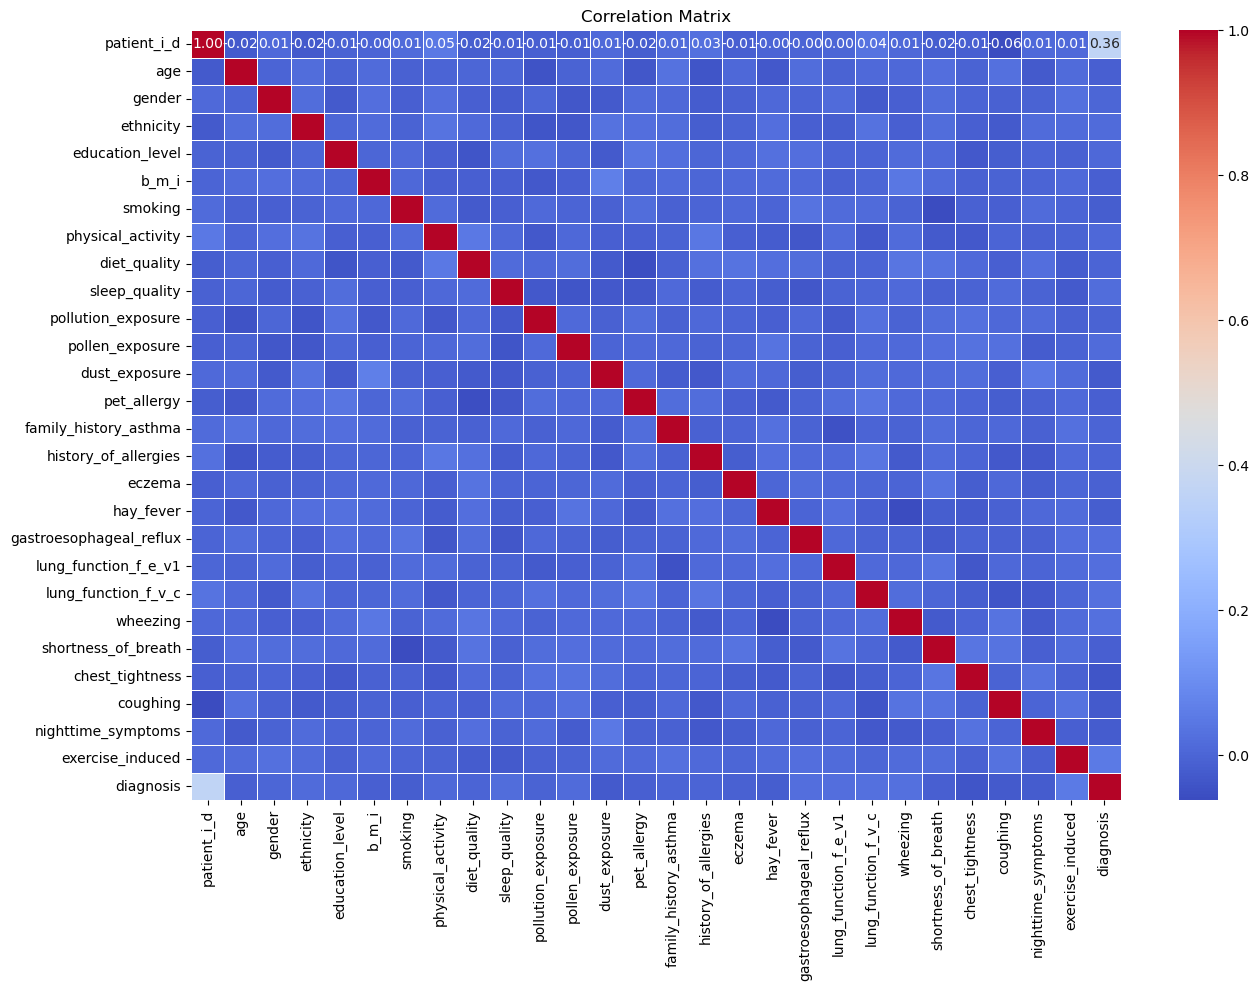

C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


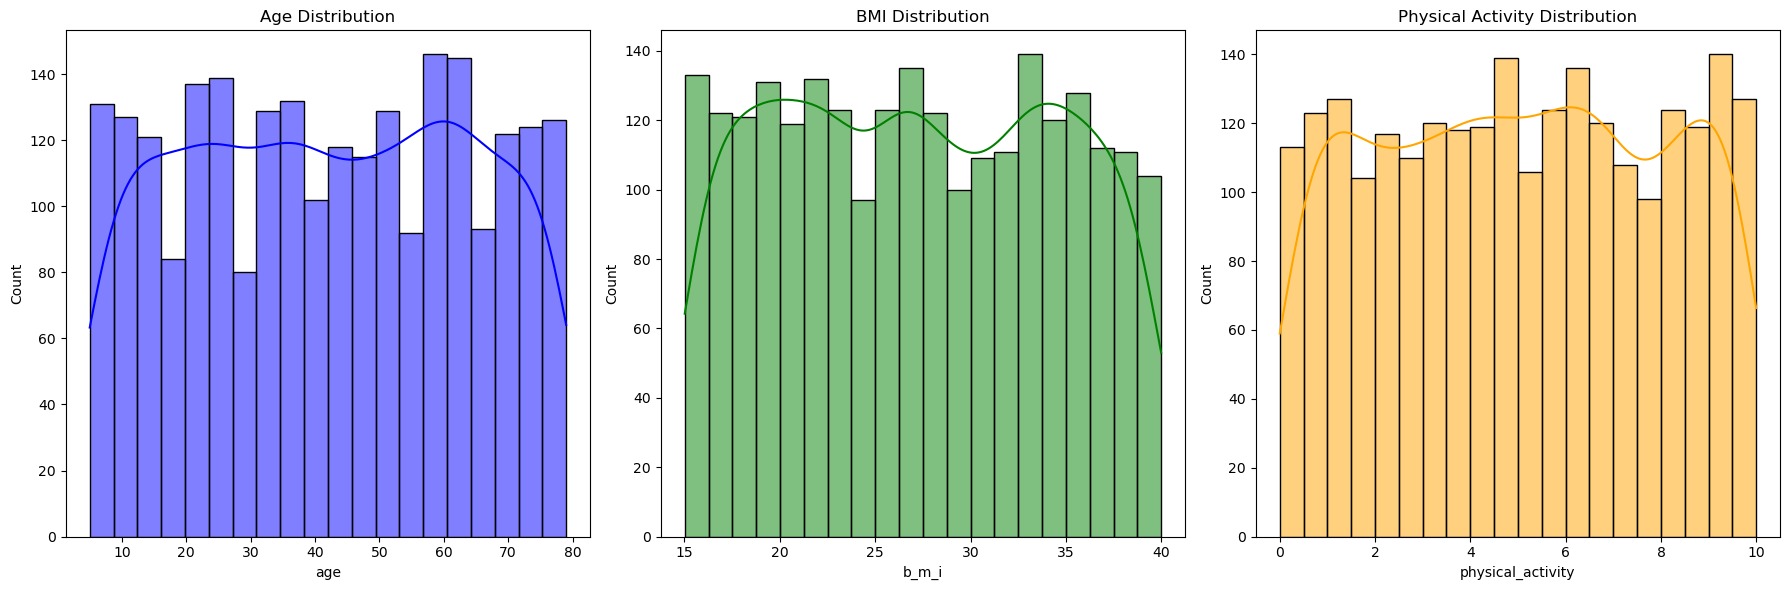

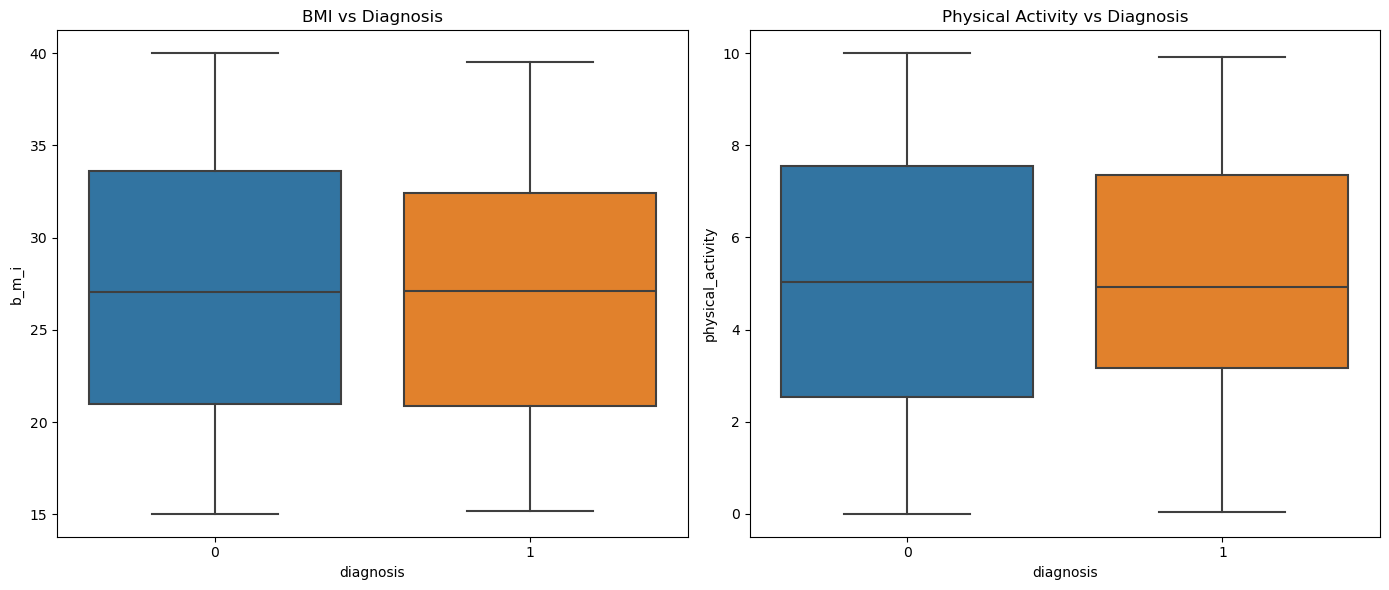

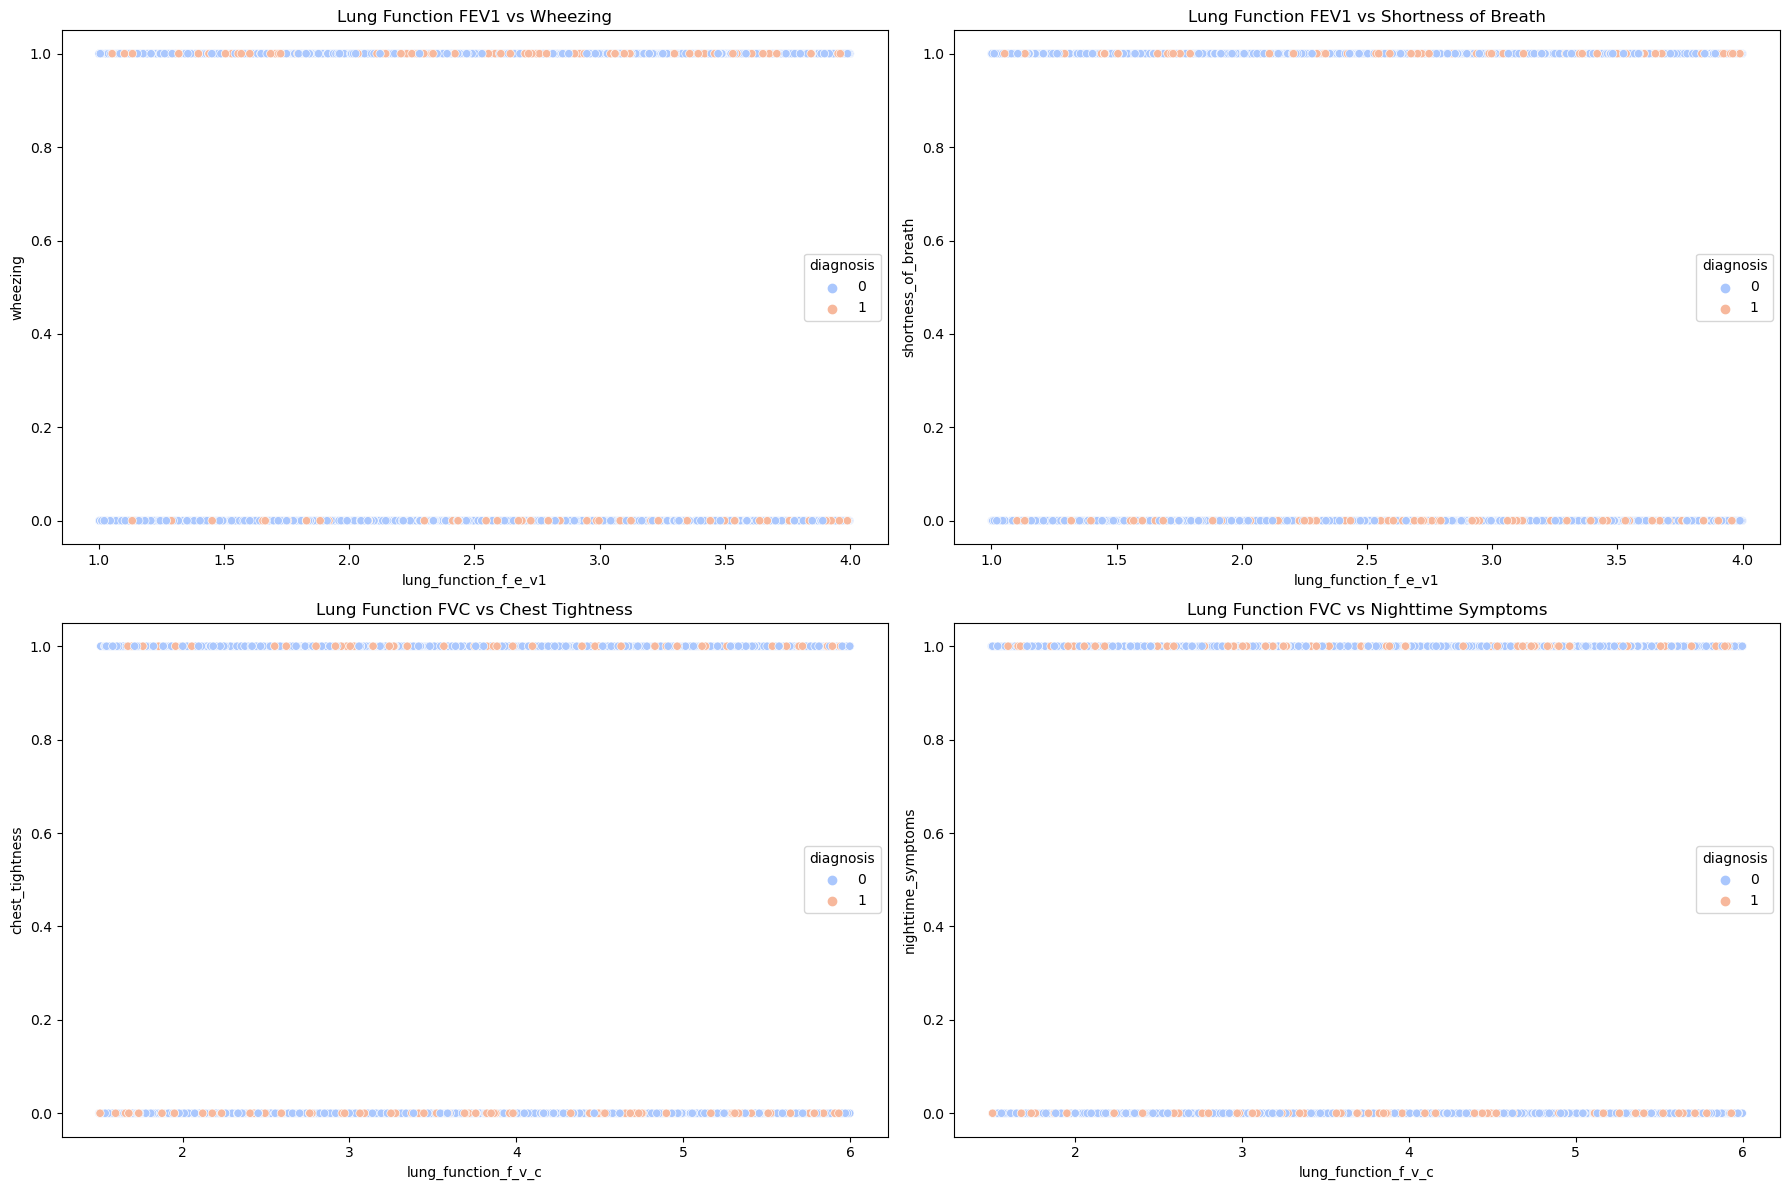

In [28]:
corr_matrix = data_clean.corr()

# Plotting the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Distribution plots for Age, BMI, and Physical Activity
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(data_clean['age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data_clean['b_m_i'], kde=True, bins=20, color='green')
plt.title('BMI Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data_clean['physical_activity'], kde=True, bins=20, color='orange')
plt.title('Physical Activity Distribution')

plt.tight_layout()
plt.show()

# Box plots for BMI and PhysicalActivity vs. Diagnosis
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='diagnosis', y='b_m_i', data=data_clean)
plt.title('BMI vs Diagnosis')

plt.subplot(1, 2, 2)
sns.boxplot(x='diagnosis', y='physical_activity', data=data_clean)
plt.title('Physical Activity vs Diagnosis')

plt.tight_layout()
plt.show()

# Scatter plots for Lung Function vs. Symptoms
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(x='lung_function_f_e_v1', y='wheezing', data=data_clean, hue='diagnosis', palette='coolwarm')
plt.title('Lung Function FEV1 vs Wheezing')

plt.subplot(2, 2, 2)
sns.scatterplot(x='lung_function_f_e_v1', y='shortness_of_breath', data=data_clean, hue='diagnosis', palette='coolwarm')
plt.title('Lung Function FEV1 vs Shortness of Breath')

plt.subplot(2, 2, 3)
sns.scatterplot(x='lung_function_f_v_c', y='chest_tightness', data=data_clean, hue='diagnosis', palette='coolwarm')
plt.title('Lung Function FVC vs Chest Tightness')

plt.subplot(2, 2, 4)
sns.scatterplot(x='lung_function_f_v_c', y='nighttime_symptoms', data=data_clean, hue='diagnosis', palette='coolwarm')
plt.title('Lung Function FVC vs Nighttime Symptoms')

plt.tight_layout()
plt.show()

### Problem 5. Feature manipulation (1 point)
Now that your data has been thoroughly cleaned (w.r.t. your goal to model diagnoses) and explored, you'll need to "play around" and prepare good features.

You don't have to think about modelling (machine learning) at this stage (although it won't do harm). Perform feature selection and feature engineering in ways that you think will be beneficial for a "mental" model of the data. Such a model consists of hypotheses that you should be able to test.

Feel free to do any sort of feature maniplulation on the data you like. Ideally, at the end of the process, you'll have a rectangular data table consisting of only (floating-point) numbers and nothing else.

In [30]:
data_clean.columns

Index(['patient_i_d', 'age', 'gender', 'ethnicity', 'education_level', 'b_m_i',
       'smoking', 'physical_activity', 'diet_quality', 'sleep_quality',
       'pollution_exposure', 'pollen_exposure', 'dust_exposure', 'pet_allergy',
       'family_history_asthma', 'history_of_allergies', 'eczema', 'hay_fever',
       'gastroesophageal_reflux', 'lung_function_f_e_v1',
       'lung_function_f_v_c', 'wheezing', 'shortness_of_breath',
       'chest_tightness', 'coughing', 'nighttime_symptoms', 'exercise_induced',
       'diagnosis'],
      dtype='object')

In [34]:
# Remove irrelevant features
data_clean_feature = data_clean.drop(columns=['patient_i_d'])

# Convert categorical features to numerical
# Assuming 'Gender' and 'Ethnicity' are categorical
data_clean_feature['gender'] =data_clean_feature['gender'].astype(float)
data_clean_feature['ethnicity'] = data_clean_feature['ethnicity'].astype(float)
data_clean_feature['education_level'] = data_clean_feature['education_level'].astype(float)

# Feature Engineering: Create interaction terms
data_clean_feature['bmi_physical_activity'] = data_clean_feature['b_m_i'] * data_clean_feature['physical_activity']
data_clean_feature['diet_sleep'] = data_clean_feature['diet_quality'] * data_clean_feature['sleep_quality']

# Normalize/Standardize features
scaler = StandardScaler()
numerical_features = data_clean_feature.columns
data_clean_feature[numerical_features] = scaler.fit_transform(data_clean_feature[numerical_features])

# Convert to all floating-point numbers (in case any int columns remain)
data_clean_feature = data_clean_feature.astype(float)

# Final check to ensure only floating-point numbers are present
assert all(data_clean_feature.dtypes == 'float64'), "There are non-float columns in the dataset."

# Display the first few rows of the final dataset
data_clean_feature.head()

,age,gender,ethnicity,education_level,b_m_i,smoking,physical_activity,diet_quality,sleep_quality,pollution_exposure,...,lung_function_f_v_c,wheezing,shortness_of_breath,chest_tightness,coughing,nighttime_symptoms,exercise_induced,diagnosis,bmi_physical_activity,diet_sleep
0,0.965740,-0.986710,0.334986,-1.455673,-1.582769,-0.406355,-1.432099,0.160113,0.971063,0.809355,...,0.920608,-1.214986,-1.000836,0.993333,-1.006711,-1.230954,0.808131,-0.233824,-1.376809,0.546087
1,-0.747054,1.013469,1.349273,0.771363,-0.623300,-0.406355,0.291269,0.453069,-1.076746,-1.036866,...,-1.564256,0.823055,-1.000836,-1.006711,0.993333,0.812378,0.808131,-0.233824,-0.035510,-0.116277
2,0.687989,-0.986710,1.349273,-0.342155,-1.229074,-0.406355,0.581330,1.434458,-0.102976,-1.210374,...,0.983019,0.823055,0.999164,0.993333,-1.006711,0.812378,0.808131,-0.233824,-0.149855,1.211757
3,-0.098970,1.013469,1.349273,-0.342155,1.565307,-0.406355,-1.256398,0.276233,-1.596880,-1.509757,...,-1.105641,0.823055,-1.000836,0.993333,0.993333,0.812378,-1.237424,-0.233824,-0.930726,-0.463409
4,0.873156,-0.986710,-0.679301,1.884880,-1.105686,-0.406355,-0.154081,-0.651625,1.504976,-1.373822,...,-0.516586,0.823055,0.999164,0.993333,-1.006711,-1.230954,0.808131,-0.233824,-0.542994,-0.229676


### Problem 6. Data preparation and manipulation script (2 points)
So far, you should have tried lots of different ways to work with the data. Some of them should have been good, others - not so much. This is extremely valuable research, and we don't want to lose it, but now we have to think about automation.

Extract your data preprocessing and manipulation functions into one or more files in the `src/` (or similar) directory. Debug the code and ensure it's been optimized. Use vectorization and the `pandas` / `numpy` APIs as much as possible. I don't usually expect data processing scripts to create visualizations. Most often, they consist of functions which accept some dataframe(s) and return (an)other dataframe(s). Also, we usually avoid one-liners (e.g., a function which only calls a different function) unless there's a very good reason for them (e.g., it's semantically easier to understand).

Refactor the code so that it's **reusable**. Function parameters (and polymorphism) achieve a lot in terms of reusability :). Avoid hardcoding stuff. Follow the best practices in Python and the style guides. Use a linter to help you clean up your code.

### Problem 7. Documentation (1 point)
Ensure all your public-facing functions (that is, functions that are "exposed" to the user) have docstrings. Ensure they are well-documented and their purpose is clear. This is especially valuable if you're doing some advanced analysis or data manipulation. You can see various ways of creating docstrings online. There are even tools (e.g., VSCode extensions) which will help you with the docstring boilerplate.

### Problem 8. Testing (1 point)
Now that you've done the previous two problems, you have _specification_ (your documentation - it tells you what you intend to do) and _implementation_ (your well-written and refactored code - it tells you _how_ it's done). The difficult part now is to ensure these two things match.

Create unit tests for your functions. Be careful so you test _your_ code, not `pandas`'. Create hypothesis tests to validate your assumptions. Do validity checks on the input data and sanity checks on the outputs of functions. Ensure your code is well-tested. Ensure it's modular, reusable, and flexible; but most of all - that it works **correctly**. If you haven't yet (though you should have - in problem 6) - think about exceptions and exception handling.

### Problem 9. Reproducibility (1 point)
Ensure all your notebooks and scripts are not only correct, but also reproducible. List all code dependencies (probably in a `requirements.txt` file); ensure your random seeds are correct; ensure the code produces the same results when run multiple times, etc.

Do your final cleanup work. You might want to differentiate your "draft" noteoboks from your "official" ones (although I advise against that) and creat your final commits.

### * Problem 10. Above and beyond
Of course, there are many things to be done. If you have time, I advise you learn how to work with data versioning (using DVC) and data pipeline / artifact tracking (using MLFlow or a similar tool). You might also find it useful to create a "proper", advanced data pipeline where you may need to work with big files (using Dask or a similar library), or schedule and organize tasks (using data pipeline managers like Luigi or Airflow).

You might also want to do machine learning. I've deliberately stayed away from that for the purposes of the lab because it's a whole different beast, but it's a worthy challenge and it's extremely interesting.